In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots
%matplotlib inline

import sys
sys.path.append("/home/jonas/phd/NanoNets/src/")

import nanonets_utils

In [2]:
def load_data(folder, N_dev, N_stat, N_threads):

    dic = {}

    for d in range(1,N_dev+1):

        values  = [pd.read_csv(folder+f"/d{d}/Nx=5_Ny=5_Nz=1_Ne=2_t{j}_s{k}.csv") for j in range(N_threads) for k in range(N_stat)]
        
        means           = pd.DataFrame(np.mean(values, axis=0),columns=values[0].columns)
        means['Error']  = np.std(values,axis=0)[:,-2]/np.sqrt(50)

        dic[d]  = means

    return dic

def average_states(folder, N_dev, N_stat, N_threads):

    for d in range(1,N_dev+1):

        values  = [pd.read_csv(folder+f"/d{d}/mean_state_Nx=5_Ny=5_Nz=1_Ne=2_t{j}_s{k}.csv") for j in range(N_threads) for k in range(N_stat)]
        means   = pd.DataFrame(np.mean(values, axis=0),columns=values[0].columns).round(3)
        
        means.to_csv(folder+f"/d{d}/mean_state_Nx=5_Ny=5_Nz=1_Ne=2.csv", index=0)

time    = np.loadtxt("1I_1O/time.csv")[1:]*10**9
dic     = load_data("1I_1O", 1, 5, 10)
dic_R   = load_data("1I_1O_R_dis", 3, 5, 10)
dic_r   = load_data("1I_1O_radius_dis", 3, 5, 10)

In [3]:
# average_states("1I_1O", 1, 5, 10)
# average_states("1I_1O_R_dis", 3, 5, 10)
# average_states("1I_1O_radius_dis", 3, 5, 10)

In [13]:
dic_s   = {d : pd.read_csv(f'1I_1O/d{d}/mean_state_Nx=5_Ny=5_Nz=1_Ne=2.csv') for d in range(1,2)}
dic_s_R = {d : pd.read_csv(f'1I_1O_R_dis/d{d}/mean_state_Nx=5_Ny=5_Nz=1_Ne=2.csv') for d in range(1,2)}
dic_s_r = {d : pd.read_csv(f'1I_1O_radius_dis/d{d}/mean_state_Nx=5_Ny=5_Nz=1_Ne=2.csv') for d in range(1,2)}

In [4]:
# for key, df in dic.items():
#     df.to_csv(f"1I_1O/d{key}/Nx=5_Ny=5_Nz=1_Ne=2.csv", index=0)

# for key, df in dic_R.items():
#     df.to_csv(f"1I_1O_R_dis/d{key}/Nx=5_Ny=5_Nz=1_Ne=2.csv", index=0)

# for key, df in dic_r.items():
#     df.to_csv(f"1I_1O_radius_dis/d{key}/Nx=5_Ny=5_Nz=1_Ne=2.csv", index=0)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


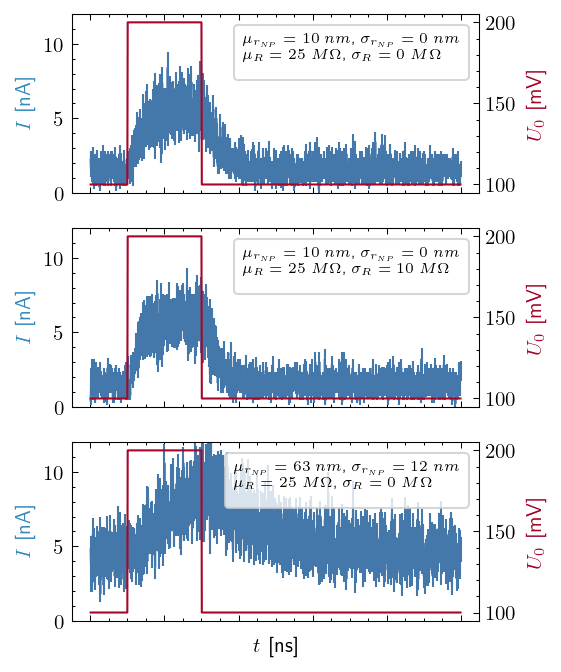

In [64]:
device = 1

with plt.style.context(["science","bright"]):

    fig = plt.figure(dpi=150)
    fig.set_figheight(fig.get_figheight()*2)

    ax  = fig.add_subplot(3,1,1)
    ax2 = ax.twinx()
    ax2.plot(time, dic_R[device]['E0']*1000, c='#A60628')
    ax2.set_ylabel("$U_0$ [mV]", c='#A60628')

    ax.errorbar(time, dic[device]['Current']/1000, dic[device]['Error']/1000, label='')
    ax.set_ylabel("$I$ [nA]", c='#348ABD')
    ax.set_ylim(0,12)
    ax.set_xticklabels("")
    ax.legend(title="$\mu_{r_{NP}} = 10$ $nm$, $\sigma_{r_{NP}} = 0$ $nm$\n$\mu_R = 25$ $M\Omega$, $\sigma_R = 0$ $M\Omega$",
              title_fontsize='x-small', frameon=True)


    ax  = fig.add_subplot(3,1,2)
    ax2 = ax.twinx()
    ax2.plot(time, dic_R[device]['E0']*1000, c='#A60628')
    ax2.set_ylabel("$U_0$ [mV]", c='#A60628')

    ax.errorbar(time, dic_R[device]['Current']/1000, dic_R[device]['Error']/1000)
    ax.set_ylabel("$I$ [nA]", c='#348ABD')
    ax.set_ylim(0,12)
    ax.set_xticklabels("")
    ax.legend(title="$\mu_{r_{NP}} = 10$ $nm$, $\sigma_{r_{NP}} = 0$ $nm$\n$\mu_R = 25$ $M\Omega$, $\sigma_R = 10$ $M\Omega$",
              title_fontsize='x-small', frameon=True)

    ax  = fig.add_subplot(3,1,3)
    ax2 = ax.twinx()
    ax2.plot(time, dic_R[device]['E0']*1000, c='#A60628')
    ax2.set_ylabel("$U_0$ [mV]", c='#A60628')
    
    ax.errorbar(time, dic_r[device]['Current']/1000, dic_r[device]['Error']/1000)
    ax.set_ylabel("$I$ [nA]", c='#348ABD')
    ax.set_ylim(0,12)
    ax.set_xticklabels("")
    ax.legend(title="$\mu_{r_{NP}} = 63$ $nm$, $\sigma_{r_{NP}} = 12$ $nm$\n$\mu_R = 25$ $M\Omega$, $\sigma_R = 0$ $M\Omega$",
              title_fontsize='x-small', frameon=True)
    ax.set_xlabel("$t$ [ns]")

    fig.savefig('plots/i_o_comp.svg', bbox_inches='tight', transparent=True)
    fig.savefig('plots/i_o_comp.pdf', bbox_inches='tight', transparent=False)

    # ax  = fig.add_subplot(4,1,4)
    # ax.plot(time, dic_R[device]['E0']*1000)
    # ax.set_xlabel("$t$ [ns]")
    # ax.set_ylabel("$U_0$ [mV]")

MovieWriter ffmpeg unavailable; using Pillow instead.
MovieWriter ffmpeg unavailable; using Pillow instead.
MovieWriter ffmpeg unavailable; using Pillow instead.


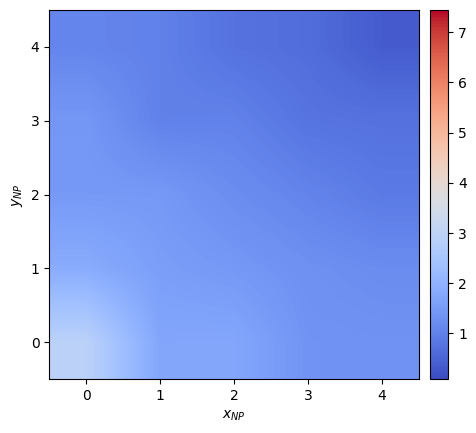

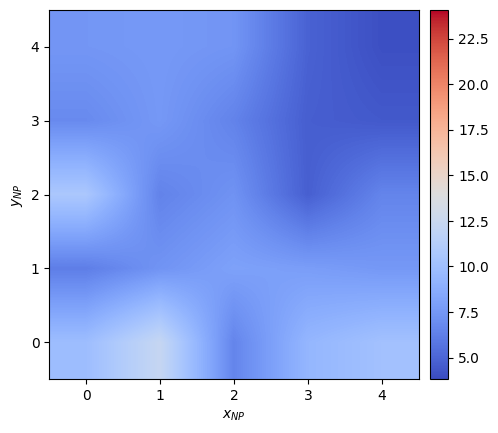

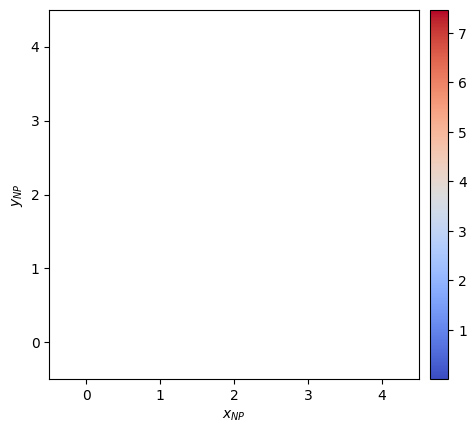

In [65]:
ani = nanonets_utils.animate_landscape("1I_1O/d1/mean_state_Nx=5_Ny=5_Nz=1_Ne=2.csv", 5 , 5, delay_between_frames=50, interpolation='bilinear')
ani.save("plots/state_animation.gif")

ani = nanonets_utils.animate_landscape("1I_1O_radius_dis/d1/mean_state_Nx=5_Ny=5_Nz=1_Ne=2.csv", 5 , 5, delay_between_frames=50, interpolation='bilinear')
ani.save("plots/state_animation_radius_d1.gif")

ani = nanonets_utils.animate_landscape("1I_1O_R_dis/d1/mean_state_Nx=5_Ny=5_Nz=1_Ne=2.csv", 5 , 5, delay_between_frames=50, interpolation='bilinear')
ani.save("plots/state_animation_R_d1.gif")

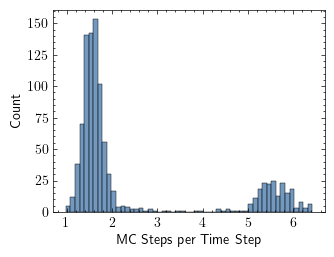

In [66]:
with plt.style.context(["science","bright"]):
    
    fig = plt.figure()
    ax  = fig.add_subplot()
    ax  = sns.histplot(data=dic[1]['Jumps'],ax=ax)#, label="$\mu_{r_{NP}} = 10$ $nm$, $\sigma_{r_{NP}} = 0$ $nm$\n$\mu_R = 25$ $M\Omega$, $\sigma_R = 0$ $M\Omega$")

    ax.set_xlabel("MC Steps per Time Step")

    fig.savefig('plots/mc_steps_per_time.svg', bbox_inches='tight', transparent=True)
    fig.savefig('plots/mc_steps_per_time.pdf', bbox_inches='tight', transparent=False)

#### State vs Time

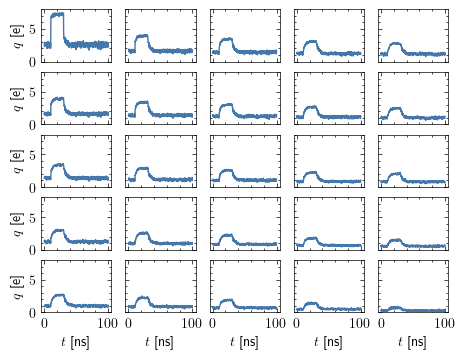

In [72]:
with plt.style.context(["science","bright"]):

    fig = plt.figure()

    fig.set_figwidth(fig.get_figwidth()*1.5)
    fig.set_figheight(fig.get_figheight()*1.5)

    for col in dic_s[1].columns:

        ax  = fig.add_subplot(5,5,int(col)+1)
        ax.errorbar(x=time, y=dic_s[1][col].values, yerr=0)
        ax.set_ylim(0,8)

        if int(col) % 5 != 0:
            ax.set_yticklabels("")
        else:
            ax.set_ylabel("$q$ [e]")
        if int(col) < 20: 
            ax.set_xticklabels("")
        else:
            ax.set_xlabel("$t$ [ns]")

    fig.savefig('plots/state_vs_time.svg', bbox_inches='tight', transparent=True)
    fig.savefig('plots/state_vs_time.pdf', bbox_inches='tight', transparent=False)

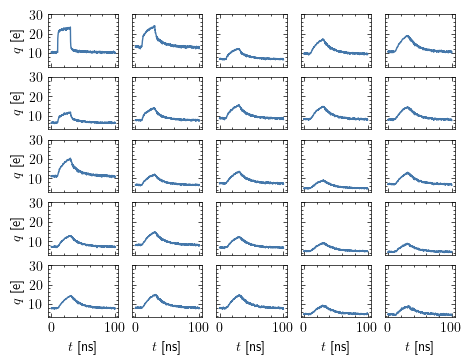

In [73]:
with plt.style.context(["science","bright"]):

    fig = plt.figure()

    fig.set_figwidth(fig.get_figwidth()*1.5)
    fig.set_figheight(fig.get_figheight()*1.5)

    for col in dic_s_r[1].columns:

        ax  = fig.add_subplot(5,5,int(col)+1)
        ax.errorbar(x=time, y=dic_s_r[1][col].values, yerr=0)
        ax.set_ylim(3,30)

        if int(col) % 5 != 0:
            ax.set_yticklabels("")
        else:
            ax.set_ylabel("$q$ [e]")
        if int(col) < 20: 
            ax.set_xticklabels("")
        else:
            ax.set_xlabel("$t$ [ns]")

    fig.savefig('plots/state_vs_time_radius_d1.svg', bbox_inches='tight', transparent=True)
    fig.savefig('plots/state_vs_time_radius_d1.pdf', bbox_inches='tight', transparent=False)

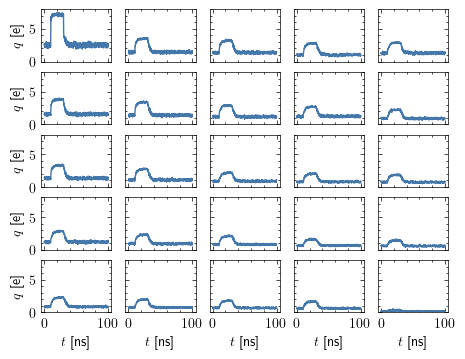

In [74]:
with plt.style.context(["science","bright"]):

    fig = plt.figure()

    fig.set_figwidth(fig.get_figwidth()*1.5)
    fig.set_figheight(fig.get_figheight()*1.5)

    for col in dic_s_R[1].columns:

        ax  = fig.add_subplot(5,5,int(col)+1)
        ax.errorbar(x=time, y=dic_s_R[1][col].values, yerr=0)
        ax.set_ylim(0,8)

        if int(col) % 5 != 0:
            ax.set_yticklabels("")
        else:
            ax.set_ylabel("$q$ [e]")
        if int(col) < 20: 
            ax.set_xticklabels("")
        else:
            ax.set_xlabel("$t$ [ns]")

    fig.savefig('plots/state_vs_time_R_d1.svg', bbox_inches='tight', transparent=True)
    fig.savefig('plots/state_vs_time_R_d1.pdf', bbox_inches='tight', transparent=False)